In [1]:
import pandas as pd
import numpy as np
winequality = pd.read_csv("winequality-red.csv")

In [2]:
winequality.head()
winequality.dtypes
winequality.describe()
winequality.shape
winequality.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

In [3]:
missing_values = winequality.isnull().sum(axis=0)

In [4]:
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
winequality["quality"].dtypes

dtype('int64')

In [6]:
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide',
                   'total sulfur dioxide', 'density', 'pH',
                   'sulphates', 'alcohol'
                  ]
target_column = 'quality'

# Create X (input features) by selecting the specified columns
X = winequality[feature_columns]
# Create y (target) by selecting the 'quality' column
y = winequality[target_column]

# Optionally, can convert X and y to NumPy arrays if needed
# X = X.to_numpy()
# y = y.to_numpy()

# Determine the number of rows for training and testing
total_samples = len(X)
train_size = int(0.8 * total_samples)  # 80% for training, 20% for testing

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1279, 11)
Shape of X_test: (320, 11)
Shape of y_train: (1279,)
Shape of y_test: (320,)


In [15]:
X_train_T = X_train.T
X_train_T_X_inv = np.linalg.inv(np.dot(X_train_T, X_train))
w = np.dot(np.dot(X_train_T_X_inv, X_train_T), y_train)
w

array([-5.99753225e-05, -1.07345734e+00, -1.77276127e-01,  2.96023452e-04,
       -1.82904808e+00,  3.53280242e-03, -3.75260225e-03,  4.39185504e+00,
       -4.59345486e-01,  7.82458418e-01,  3.05160405e-01])

In [17]:
# test value of X. Add a column of ones to X_train to include the bias term
# X_test_b = np.column_stack([np.ones((X_test.shape[0], 1)), X_test])

# actual value of y
y_test_true = y_test.to_numpy()


# Calculate predictions on the testing data
y_test_pred = np.dot(X_test, w)
y_test_pred = np.round(y_test_pred).astype(int)

# Calculate the squared errors
squared_errors = (y_test_true - y_test_pred) ** 2

mse = np.mean(squared_errors)
mse

0.46875

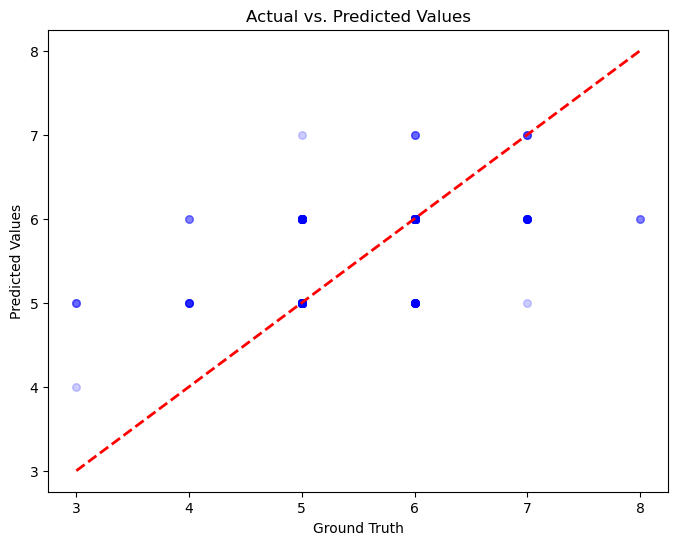

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test_true, y_test_pred, color='blue', alpha=0.2, s=30)  # Scatter plot of actual vs. predicted values

# Add labels and a title
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)


# Show the plot
plt.show()

### For fit the linear w

In [9]:
# Add a column of ones to X_train to include the bias term
X_train_b = np.column_stack([np.ones((X_train.shape[0], 1)), X_train])

# Compute the closed-form solution
X_train_b_T = X_train_b.T  # Transpose of X_train_b
X_train_b_T_X_train_b_inv = np.linalg.inv(np.dot(X_train_b_T, X_train_b))  # Inverse of (X_train_b^T * X_train_b)
w = np.dot(np.dot(X_train_b_T_X_train_b_inv, X_train_b_T), y_train)

In [10]:
w

array([ 2.33227654e+01,  2.28090167e-02, -1.05177082e+00, -1.80128847e-01,
        1.05929687e-02, -1.75847505e+00,  3.32001580e-03, -3.68667263e-03,
       -1.94209303e+01, -3.41497474e-01,  8.07227084e-01,  2.83389811e-01])

### For eval the linear w

In [ ]:
# test value of X. Add a column of ones to X_train to include the bias term
X_test_b = np.column_stack([np.ones((X_test.shape[0], 1)), X_test])

# actual value of y
y_test_true = y_test.to_numpy()


# Calculate predictions on the testing data
y_test_pred = np.dot(X_test_b, w)
y_test_pred = np.round(y_test_pred).astype(int)

# Calculate the squared errors
squared_errors = (y_test_true - y_test_pred) ** 2

mse = np.mean(squared_errors)


In [11]:
# test value of X. Add a column of ones to X_train to include the bias term
X_test_b = np.column_stack([np.ones((X_test.shape[0], 1)), X_test])

# actual value of y
y_test_true = y_test.to_numpy()


# Calculate predictions on the testing data
y_test_pred = np.dot(X_test_b, w)
y_test_pred = np.round(y_test_pred).astype(int)

# Calculate the squared errors
squared_errors = (y_test_true - y_test_pred) ** 2

mse = np.mean(squared_errors)


In [12]:
mse

0.475

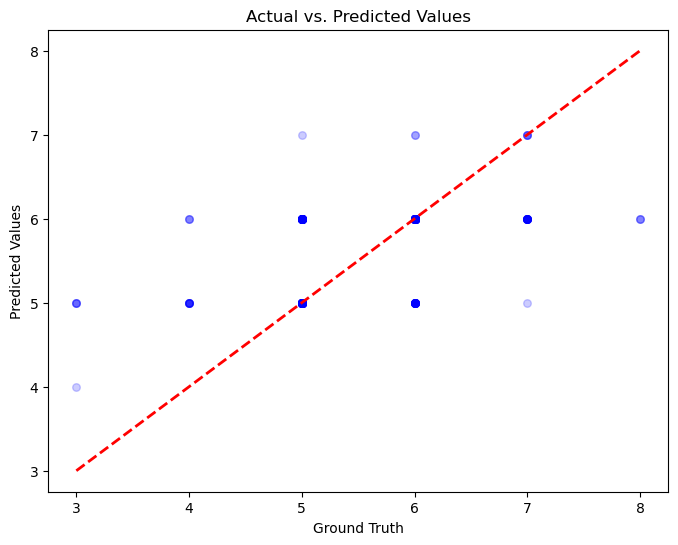

In [13]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(y_test_true, y_test_pred, color='blue', alpha=0.2, s=30)  # Scatter plot of actual vs. predicted values

# Add labels and a title
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)


# Show the plot
plt.show()

In [19]:
import pandas as pd
import numpy as np
penguins = pd.read_csv("penguins.csv")

In [20]:
penguins.head()
penguins.dtypes
penguins.describe()
penguins.shape
penguins.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex     year
Adelie   Biscoe     34.5            18.1           187.0              2900.0       female  2008    1
Gentoo   Biscoe     44.0            13.6           208.0              4350.0       female  2008    1
                    43.6            13.9           217.0              4900.0       female  2008    1
                    43.5            15.2           213.0              4650.0       female  2009    1
                                    14.2           220.0              4700.0       female  2008    1
                                                                                                  ..
Adelie   Torgersen  36.6            17.8           185.0              3700.0       female  2007    1
                    36.2            17.2           187.0              3150.0       female  2009    1
                                    16.1           187.0              3550.0       female  2008 

In [21]:
missing_values = penguins.isnull().sum(axis=0)

In [23]:
missing_values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [24]:
# drop missing values

# List of columns with missing values
columns_with_missing = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

# Drop rows with missing values in the specified columns
penguins_cleaned = penguins.dropna(subset=columns_with_missing)


In [25]:
penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [26]:
# List of columns to convert to categorical
# columns_to_convert = ['species', 'island', 'sex']

# Convert the specified columns to categorical
penguins_cleaned_copy = penguins_cleaned.copy()

penguins_cleaned_copy['species'] = penguins_cleaned_copy['species'].astype('category')
penguins_cleaned_copy['island'] = penguins_cleaned_copy['island'].astype('category')  # Corrected column name
penguins_cleaned_copy['sex'] = penguins_cleaned_copy['sex'].astype('category')  # Corrected column name

penguins = penguins_cleaned_copy

In [27]:
penguins.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [28]:

# List of non-categorical columns to normalize
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


# Calculate the min and max values for each column
min_max_values = penguins[columns_to_normalize].agg(['min', 'max'])

In [29]:
min_max_values

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
min,32.1,13.1,172.0,2700.0
max,59.6,21.5,231.0,6300.0


In [30]:
# Loop through each column and apply Min-Max scaling
for column in columns_to_normalize:
    min_value = penguins[column].min()
    max_value = penguins[column].max()
    penguins[column] = (penguins[column] - min_value) / (max_value - min_value)

In [31]:
min_max_values

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
min,32.1,13.1,172.0,2700.0
max,59.6,21.5,231.0,6300.0


In [32]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female,2007
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female,2007
5,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.593220,0.361111,male,2009
340,Chinstrap,Dream,0.414545,0.595238,0.508475,0.194444,female,2009
341,Chinstrap,Dream,0.636364,0.607143,0.355932,0.298611,male,2009
342,Chinstrap,Dream,0.680000,0.702381,0.644068,0.388889,male,2009


In [233]:
feature_columns_penguins = ['species', 'island', 'bill_length_mm', 
                   'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'
                  ]
target_column_penguins = 'sex'

# Create X (input features) by selecting the specified columns
X_penguins = penguins[feature_columns_penguins]
# Create y (target) by selecting the 'sex' column
y_penguins = penguins[target_column_penguins]

# Optionally, can convert X and y to NumPy arrays if needed
# X = X.to_numpy()
# y = y.to_numpy()

# Shuffle the data (optional)
penguins = penguins.sample(frac=1, random_state=42)  # Randomly shuffle the dataset

# Determine the number of rows for training and testing
total_samples_penguins = len(X_penguins)
train_size_penguins = int(0.8 * total_samples_penguins)  # 80% for training, 20% for testing

X_penguins_train = X_penguins[:train_size_penguins]
y_penguins_train = y_penguins[:train_size_penguins]
X_penguins_test = X_penguins[train_size_penguins:]
y_penguins_test = y_penguins[train_size_penguins:]

X_penguins_train = X_penguins_train.to_numpy()
y_penguins_train_array = y_penguins_train.to_numpy()
X_penguins_test = X_penguins_test.to_numpy()
y_penguins_test_array = y_penguins_test.to_numpy()

X_penguins_train = X_penguins_train[:,2:-1]
X_penguins_test = X_penguins_test[:, 2:-1]

y_penguins_train = []
for item in list(y_penguins_train_array):
    if item == 'female':
        y_penguins_train.append(0)
    else:
        y_penguins_train.append(1)
y_penguins_train = np.array(y_penguins_train)
y_penguins_train = y_penguins_train.reshape(-1, 1)

y_penguins_test = []
for item in list(y_penguins_test_array):
    if item == 'female':
        y_penguins_test.append(0)
    else:
        y_penguins_test.append(1)
y_penguins_test = np.array(y_penguins_test)
y_penguins_test = y_penguins_test.reshape(-1, 1)
        
# Check the shapes of the resulting sets
print("Shape of X_penguins_train:", X_penguins_train.shape)
print("Shape of X_penguins_test:", X_penguins_test.shape)
print("Shape of y_penguins_train:", y_penguins_train.shape)
print("Shape of y_penguins_test:", y_penguins_test.shape)


Shape of X_penguins_train: (266, 4)
Shape of X_penguins_test: (67, 4)
Shape of y_penguins_train: (266, 1)
Shape of y_penguins_test: (67, 1)


In [234]:
X_penguins_train.shape

(266, 4)

In [281]:
# m, n = X_penguins_train.shape
# weights = np.random.uniform(0, 1, n)

class LogitRegression:
    def __init__(self, learning_rate=1e-6, iterations=100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.loss = []
        self.delta = 1e-7
    
    def initialize_params(self, dims):
        W = np.random.random((dims, 1))
        b = 0
        return W, b


    def sigmoid(self, z):
        z = z.astype(float)
        return 1 / (1 + np.exp(-z))

    def cross_entropy(self, y, y_pred, num_train):
        ## set the delta = 1e-7 for the np.log(0) happen
        cost = -1 / num_train * np.sum(y * np.log(y_pred+self.delta) \
                        + (1 - y) * np.log(1 - y_pred+self.delta))
        return cost

#     def cost(self, y, y_pred):
#         log_loss = -1 / m * np.sum(y_penguins_train * np.log(y_pred) + (1 - y_penguins_train) * np.log(1 - y_pred))
#         return cross_entropy

#     def gradient_descent(self, X_penguins_train, y_penguins_train, y_pred):
#         m = len(y_penguins_train)
#         dw = (1 / m) * np.dot(X_penguins_train.T, (y_pred - y_penguins_train))
#         db = (1 / m) * np.sum(y_pred - y_penguins_train)
#         return dw, db

    def gradient_descent(self, X_penguins, y_penguins, W, b):
        num_train = X_penguins.shape[0]
        num_feature = X_penguins.shape[1]
        y_pred = self.sigmoid(np.dot(X_penguins, W) + b)
        cost = self.cross_entropy(y_penguins, y_pred, num_train)
        dW = np.dot(X_penguins.T, (y_pred - y_penguins)) / num_train
        db = np.sum(y_pred - y_penguins) / num_train
        cost = np.squeeze(cost)
        return y_pred, cost, dW, db

    
    def fit(self, X_penguins, y_penguins):
        W, b = self.initialize_params(X_penguins.shape[1])
        cost_list = []
        
        for i in range(self.iterations):
            a, cost, dW, db = self.gradient_descent(X_penguins, y_penguins, W, b)
            W = W - self.learning_rate * dW
            
            b = b - self.learning_rate * db
            if i % 100 == 0:
                cost_list.append(cost)
            if i % 100 == 0:
                print('iterations [%07d] ===> cost [%.4f]' % (i, cost))
        
        params = {
            'W': W,
            'b': b
        }
        grads = {
            'dW': dW,
            'db': db
        }
        return cost_list, params, grads

    def predict(self, X_penguins, params):
        y_prediction = self.sigmoid(np.dot(X_penguins, params['W']) + params['b'])
        # binary classify
        for i in range(len(y_prediction)):
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0
        return y_prediction

    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):
            for j in range(len(y_pred)):
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1
        accuracy_score = correct_count / len(y_test)
        return accuracy_score
    
    
#     def fit(self, X_penguins_train, y_penguins_train):
#         for i in range(self.iterations):
#             linear_model = np.dot(X_penguins_train, self.weights) + self.bias
#             y_pred = self.sigmoid(linear_model)

#             dw, db = self.gradient_descent(X_penguins_train, y_penguins_train, y_pred)

#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db

#             current_loss = self.cost(y_penguins_train, y_pred)
#             self.loss.append(current_loss)

#     def predict(self, X_penguins_train):
#         linear_model = np.dot(X_penguins_train, self.weights) + self.bias
#         y_pred_prob = self.sigmoid(linear_model)
#         y_pred_binary = (y_pred_prob >= 0.5).astype(int)
#         return y_pred_binary



In [282]:
learning_rate = 1e-3
iterations = 100000


model = LogitRegression(learning_rate=learning_rate, iterations=iterations)
#### Train the model by calling the fit method and passing the training data
_, params, _ = model.fit(X_penguins_train, y_penguins_train)

y_penguins_pred = model.predict(X_penguins_test, params)
accuracy = model.accuracy(y_penguins_test, y_penguins_pred)
print(accuracy)

iterations [0000000] ===> cost [0.7282]
iterations [0000100] ===> cost [0.7219]
iterations [0000200] ===> cost [0.7161]
iterations [0000300] ===> cost [0.7107]
iterations [0000400] ===> cost [0.7056]
iterations [0000500] ===> cost [0.7009]
iterations [0000600] ===> cost [0.6966]
iterations [0000700] ===> cost [0.6925]
iterations [0000800] ===> cost [0.6888]
iterations [0000900] ===> cost [0.6853]
iterations [0001000] ===> cost [0.6821]
iterations [0001100] ===> cost [0.6791]
iterations [0001200] ===> cost [0.6763]
iterations [0001300] ===> cost [0.6737]
iterations [0001400] ===> cost [0.6713]
iterations [0001500] ===> cost [0.6690]
iterations [0001600] ===> cost [0.6670]
iterations [0001700] ===> cost [0.6650]
iterations [0001800] ===> cost [0.6632]
iterations [0001900] ===> cost [0.6615]
iterations [0002000] ===> cost [0.6600]
iterations [0002100] ===> cost [0.6585]
iterations [0002200] ===> cost [0.6571]
iterations [0002300] ===> cost [0.6559]
iterations [0002400] ===> cost [0.6547]


iterations [0022300] ===> cost [0.5908]
iterations [0022400] ===> cost [0.5906]
iterations [0022500] ===> cost [0.5903]
iterations [0022600] ===> cost [0.5901]
iterations [0022700] ===> cost [0.5899]
iterations [0022800] ===> cost [0.5896]
iterations [0022900] ===> cost [0.5894]
iterations [0023000] ===> cost [0.5892]
iterations [0023100] ===> cost [0.5890]
iterations [0023200] ===> cost [0.5887]
iterations [0023300] ===> cost [0.5885]
iterations [0023400] ===> cost [0.5883]
iterations [0023500] ===> cost [0.5881]
iterations [0023600] ===> cost [0.5878]
iterations [0023700] ===> cost [0.5876]
iterations [0023800] ===> cost [0.5874]
iterations [0023900] ===> cost [0.5872]
iterations [0024000] ===> cost [0.5869]
iterations [0024100] ===> cost [0.5867]
iterations [0024200] ===> cost [0.5865]
iterations [0024300] ===> cost [0.5863]
iterations [0024400] ===> cost [0.5861]
iterations [0024500] ===> cost [0.5858]
iterations [0024600] ===> cost [0.5856]
iterations [0024700] ===> cost [0.5854]


iterations [0044200] ===> cost [0.5475]
iterations [0044300] ===> cost [0.5474]
iterations [0044400] ===> cost [0.5472]
iterations [0044500] ===> cost [0.5470]
iterations [0044600] ===> cost [0.5468]
iterations [0044700] ===> cost [0.5467]
iterations [0044800] ===> cost [0.5465]
iterations [0044900] ===> cost [0.5463]
iterations [0045000] ===> cost [0.5462]
iterations [0045100] ===> cost [0.5460]
iterations [0045200] ===> cost [0.5458]
iterations [0045300] ===> cost [0.5456]
iterations [0045400] ===> cost [0.5455]
iterations [0045500] ===> cost [0.5453]
iterations [0045600] ===> cost [0.5451]
iterations [0045700] ===> cost [0.5450]
iterations [0045800] ===> cost [0.5448]
iterations [0045900] ===> cost [0.5446]
iterations [0046000] ===> cost [0.5445]
iterations [0046100] ===> cost [0.5443]
iterations [0046200] ===> cost [0.5441]
iterations [0046300] ===> cost [0.5440]
iterations [0046400] ===> cost [0.5438]
iterations [0046500] ===> cost [0.5436]
iterations [0046600] ===> cost [0.5435]


iterations [0068500] ===> cost [0.5107]
iterations [0068600] ===> cost [0.5106]
iterations [0068700] ===> cost [0.5105]
iterations [0068800] ===> cost [0.5103]
iterations [0068900] ===> cost [0.5102]
iterations [0069000] ===> cost [0.5101]
iterations [0069100] ===> cost [0.5099]
iterations [0069200] ===> cost [0.5098]
iterations [0069300] ===> cost [0.5097]
iterations [0069400] ===> cost [0.5095]
iterations [0069500] ===> cost [0.5094]
iterations [0069600] ===> cost [0.5093]
iterations [0069700] ===> cost [0.5091]
iterations [0069800] ===> cost [0.5090]
iterations [0069900] ===> cost [0.5089]
iterations [0070000] ===> cost [0.5087]
iterations [0070100] ===> cost [0.5086]
iterations [0070200] ===> cost [0.5085]
iterations [0070300] ===> cost [0.5083]
iterations [0070400] ===> cost [0.5082]
iterations [0070500] ===> cost [0.5081]
iterations [0070600] ===> cost [0.5079]
iterations [0070700] ===> cost [0.5078]
iterations [0070800] ===> cost [0.5077]
iterations [0070900] ===> cost [0.5076]


iterations [0089300] ===> cost [0.4854]
iterations [0089400] ===> cost [0.4852]
iterations [0089500] ===> cost [0.4851]
iterations [0089600] ===> cost [0.4850]
iterations [0089700] ===> cost [0.4849]
iterations [0089800] ===> cost [0.4848]
iterations [0089900] ===> cost [0.4847]
iterations [0090000] ===> cost [0.4846]
iterations [0090100] ===> cost [0.4845]
iterations [0090200] ===> cost [0.4844]
iterations [0090300] ===> cost [0.4842]
iterations [0090400] ===> cost [0.4841]
iterations [0090500] ===> cost [0.4840]
iterations [0090600] ===> cost [0.4839]
iterations [0090700] ===> cost [0.4838]
iterations [0090800] ===> cost [0.4837]
iterations [0090900] ===> cost [0.4836]
iterations [0091000] ===> cost [0.4835]
iterations [0091100] ===> cost [0.4834]
iterations [0091200] ===> cost [0.4833]
iterations [0091300] ===> cost [0.4831]
iterations [0091400] ===> cost [0.4830]
iterations [0091500] ===> cost [0.4829]
iterations [0091600] ===> cost [0.4828]
iterations [0091700] ===> cost [0.4827]
